# Langchain and Google Gemini

- [Gemini API Quickstart](https://ai.google.dev/gemini-api/docs/quickstart?lang=python)

In [28]:
%%capture
!pip install -q langchain langchain-google-genai openai
!pip install -q pillow

In [5]:
import os
import openai
import getpass
import google.generativeai as genai

In [8]:
if 'GOOGLE_API_KEY' not in os.environ:
    os.environ['GOOGLE_API_KEY'] = getpass.getpass('Provide your Google API Key: ')

In [11]:
# print(os.getenv("GOOGLE_API_KEY"))

In [15]:
# list all available models
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))
for model in genai.list_models():
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/embedding-001
models/text-embedding-004
models/aqa


## Integrating Gemini with Langchain

In [16]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.9)

response = llm.invoke("Write a paragraph about life on Mars in year 2100.")
print(response.content)

In the twilight of the 21st century, life on Mars had transformed into an extraordinary reality. The once barren landscape now bustled with thriving habitats, their silvery domes shimmering under a Martian sunset. Martian colonists had ingeniously harnessed the planet's resources, creating an artificial atmosphere and cultivating crops in hyper-advanced greenhouses. As the sun rose over the Martian horizon, a symphony of automated vehicles zipped through the streets, transporting personnel and supplies to various research facilities and living quarters. The colony had achieved self-sufficiency, relying on solar energy, water recycling, and a state-of-the-art biosphere that sustained their oxygen supply. Amidst the scientific endeavors, a vibrant community had blossomed, complete with communal gardens, a theater, and even a modest library filled with literary treasures from Earth. Life on Mars had become a testament to human ingenuity, determination, and the unyielding pursuit of knowle

In [20]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

llm = ChatGoogleGenerativeAI(model="gemini-pro")

prompt = PromptTemplate.from_template("You are a content creator. Write me a tweet about {topic}")
chain = LLMChain(
    llm=llm,
    prompt=prompt,
    verbose=True
)

topic =  "Why will AI change the world?"
response = chain.invoke(input=topic)
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
You are a content creator. Write me a tweet about Why will AI change the world?

> Finished chain.
{'topic': 'Why will AI change the world?', 'text': "Prepare for a revolution! 🤖 #AI is poised to transform our world, unlocking unprecedented possibilities. From revolutionizing industries to empowering individuals, the future is bright with AI's transformative power. Stay tuned for the incredible journey ahead! #AIFuture #TechRevolution"}


In [23]:
response["text"]

"Prepare for a revolution! 🤖 #AI is poised to transform our world, unlocking unprecedented possibilities. From revolutionizing industries to empowering individuals, the future is bright with AI's transformative power. Stay tuned for the incredible journey ahead! #AIFuture #TechRevolution"

## System Prompt and Streaming

### System Prompt

In [24]:
from langchain_core.messages import HumanMessage, SystemMessage

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

output = llm.invoke(
    [
        SystemMessage(content="Answer only YES or NO."),
        HumanMessage(content="Is fish a mammal?")
    ]
)
output.content

'NO \n'

### Streaming

In [25]:
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0)
prompt = "Write a scientific paper outlining the mathematical foundation of our universe."
response = llm.invoke(prompt)
print(response.content)

**Title:** The Mathematical Foundation of Our Universe

**Abstract:**

The universe we inhabit is governed by a set of fundamental mathematical principles that underpin its structure, dynamics, and evolution. This paper explores the mathematical foundation of our universe, examining the key mathematical concepts and theories that provide a framework for understanding the cosmos. We discuss the role of geometry, topology, algebra, and calculus in describing the universe's properties and behavior.

**Introduction:**

The pursuit of understanding the universe has been a central endeavor of human inquiry for centuries. From the ancient Greeks to modern-day physicists, scientists have sought to unravel the mysteries of the cosmos through observation, experimentation, and mathematical modeling. Mathematics has emerged as an indispensable tool in this quest, providing a language for describing the universe's structure and dynamics.

**Geometry and Topology:**

Geometry and topology are fundam

In [27]:
from IPython.display import Markdown, display

# enable streaming
for chunk in llm.stream(prompt):
    # Display the output as markdown
    display(Markdown(chunk.content))
    print("-" * 100)
    

**Title:** The Mathematical Foundation of Our Universe

**Abstract:**

The universe

----------------------------------------------------------------------------------------------------


 we inhabit is governed by a set of fundamental mathematical principles that underpin its structure, dynamics, and evolution. This paper explores the mathematical foundation of our universe, examining

----------------------------------------------------------------------------------------------------


 the key mathematical concepts and theories that provide a framework for understanding the cosmos. We discuss the role of geometry, topology, algebra, and calculus in describing the universe's properties and behavior.

**Introduction:**

The pursuit of understanding the universe has been a central endeavor of human inquiry for centuries. From the ancient Greeks

----------------------------------------------------------------------------------------------------


 to modern-day physicists, scientists have sought to unravel the mysteries of the cosmos through observation, experimentation, and mathematical modeling. Mathematics has emerged as an indispensable tool in this quest, providing a language for describing the universe's structure and dynamics.

**Geometry and Topology:**

Geometry and topology are fundamental mathematical disciplines that describe the shape and structure of objects. In cosmology, geometry is used to model the curvature of spacetime, which determines the universe's expansion and evolution. Topology, on the other hand, deals with the properties of objects that remain unchanged under continuous deformations. It is used to study the topology of the universe, including its

----------------------------------------------------------------------------------------------------


 connectedness and the existence of multiple universes.

**Algebra:**

Algebra is a branch of mathematics that deals with the study of structures, such as groups, rings, and fields. In cosmology, algebra is used to describe the symmetries and conservation laws of the universe. For example, the Standard Model of particle physics is based on the symmetry group SU(3) x SU(2) x U(1).

**Calculus:**

Calculus is a mathematical tool that allows us to study the rate of change of quantities. In cosmology, calculus is used to describe the evolution of the universe, including the expansion of the universe, the formation of galaxies, and the evolution of stars.

**Mathematical Models of the Universe:**

The mathematical foundation of our universe has led to the development of various mathematical models that attempt to describe its properties and behavior. These models include:

* **The Friedmann-Lemaître-Robertson-Walker (FLRW) metric:** This metric describes the geometry of a homogeneous and isotropic universe.
* **The Big Bang theory:** This theory describes the origin and evolution of the universe, starting from a hot, dense state.
* **The Standard Model of particle physics:** This theory describes the fundamental particles and forces that make up the universe

----------------------------------------------------------------------------------------------------


.

**Conclusion:**

The mathematical foundation of our universe provides a framework for understanding the structure, dynamics, and evolution of the cosmos. Geometry, topology, algebra, and calculus are essential mathematical tools that have enabled scientists to make significant progress in unraveling the mysteries of the universe. As we continue to explore the cosmos, mathematics will undoubtedly play an increasingly important role in our quest for knowledge.

----------------------------------------------------------------------------------------------------


## Multimodal AI with Gemini Pro Vision

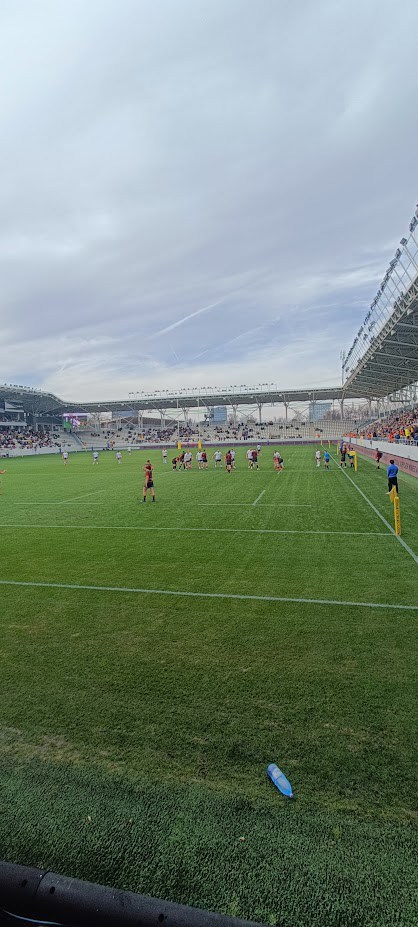

In [29]:
from PIL import Image

img = Image.open("match.jpg")
img

In [35]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

byte_image = encode_image("match.jpg")
# byte_image

In [30]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

In [42]:
# Create LLM instance, using a model specialized for images
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
prompt = "What is this image about?"

# Create a structured message combining text and image reference
message = HumanMessage(
  content=[
    {'type': 'text', 'text': prompt},  # Include the textual prompt
    {
        'type': 'image_url', 
        'image_url': f"data:image/jpeg;base64,{byte_image}"}  # Include a reference to the image
  ]
)  

# Send the message to the LLM for analysis
response = llm.invoke([message]) 
# Print the LLM's description of the image 
print(response.content)

The image shows a football game being played on a green field in a stadium. The players are wearing red and white uniforms. The stands are full of spectators. The sky is cloudy.


In [71]:
import requests
from PIL import Image
from io import BytesIO
import IPython.display as display

def display_image_from_url(url):
    try:
        # Send a GET request to fetch the image data
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful
        
        # Open the image data in PIL
        image = Image.open(BytesIO(response.content))
        
        # Display the image in the notebook
        display.display(image)
    except requests.exceptions.RequestException as e:
        print(f"Error fetching image from URL: {e}")


def save_image_from_url(url, save_path):
    """
    Downloads an image from a given URL and saves it to the specified path on disk.

    Parameters:
    ----------
    url : str
        The URL of the image to download.
    save_path : str
        The local file path where the image will be saved, including the file name and extension.
    
    Returns:
    -------
    None
        The function does not return any value. It saves the image to the specified path or 
        prints an error message if downloading or saving fails.

    Usage:
    ------
    save_image_from_url("https://example.com/image.jpg", "/path/to/save/image.jpg")

    Notes:
    ------
    - Ensure that the `save_path` includes the correct file extension (e.g., ".jpg" or ".png").
    - The function overwrites the file at `save_path` if it already exists.
    - Requires the `requests` and `PIL` libraries.
    """
    try:
        # Send a GET request to fetch the image data
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful
        
        # Open the image data in PIL and save it to the specified path
        image = Image.open(BytesIO(response.content))
        
        # Ensure the directory exists
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        
        # Save the image to the specified path
        image.save(save_path)
        print(f"Image successfully saved to {save_path}")
    
    except requests.exceptions.RequestException as e:
        print(f"Error fetching image from URL: {e}")
    except IOError as e:
        print(f"Error saving image to {save_path}: {e}")


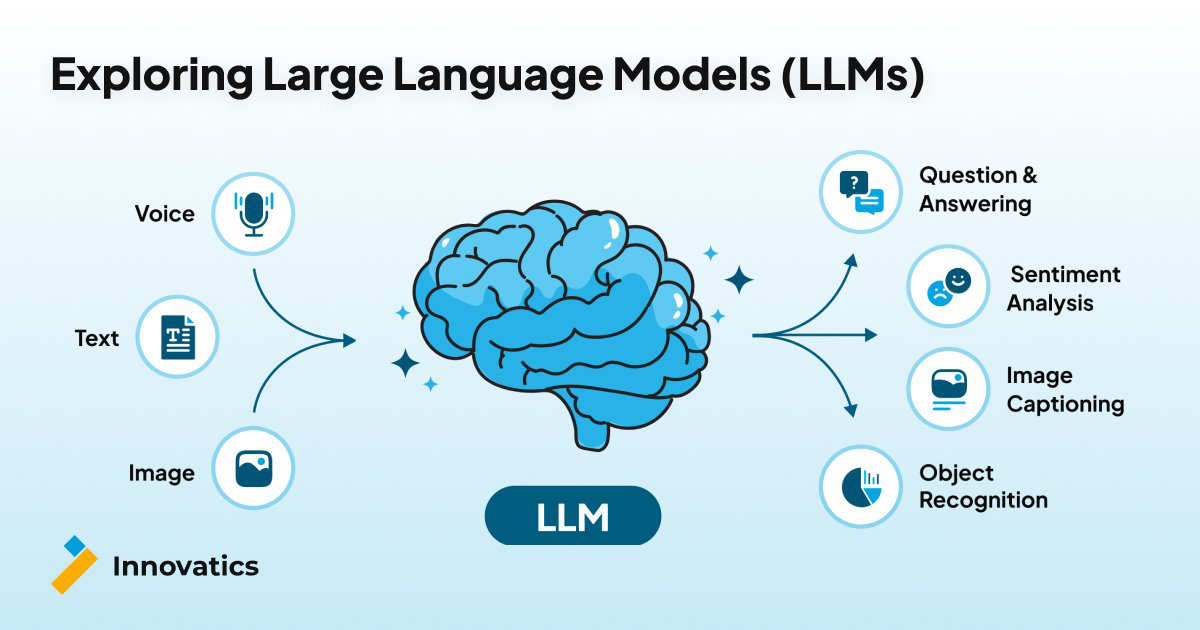

In [72]:
image_url = "https://teaminnovatics.com/wp-content/uploads/2024/06/large-language-models-llms-process.jpg"
display_image_from_url(image_url)

In [73]:
save_image_from_url(image_url, "files/llm.jpg")

Image successfully saved to files/llm.jpg


In [47]:
# Create a structured message combining text and image reference
message = HumanMessage(
  content=[
    {'type': 'text', 'text': prompt},  # Include the textual prompt
    {
        'type': 'image_url', 
        'image_url': image_url  # Include a reference to the image
    }
   ]
)  

# Send the message to the LLM for analysis
response = llm.invoke([message]) 
# Print the LLM's description of the image 
print(response.content)

This image is about Large Language Models (LLMs) and their capabilities. LLMs are a type of artificial intelligence that can process and understand human language. The image shows that LLMs can be used for a variety of tasks, including:

- Question answering
- Sentiment analysis
- Image captioning
- Object recognition

The image also shows that LLMs can be trained on different types of data, including text, voice, and images. This makes them a powerful tool for a wide range of applications.


In [60]:
def ask_gemini(text, image_path, model="gemini-1.5-flash"):
    try:
        byte_image = encode_image(image_path)
        image_url = f"data:image/jpeg;base64,{byte_image}"
    except FileNotFoundError:
        # if image path is url string
        image_url = image_path
    # Create LLM instance, using a model specialized for images
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
    prompt = text
    
    # Create a structured message combining text and image reference
    message = HumanMessage(
      content=[
        {'type': 'text', 'text': prompt},  # Include the textual prompt
        {
            'type': 'image_url', 
            'image_url': image_url   # Include a reference to the image
        }
      ]
    )  
    
    # Send the message to the LLM for analysis
    response = llm.invoke([message])
    return response

In [61]:
response = ask_gemini('What is this sport? How can I identify the sport in this picture?', "match.jpg")
print(response.content)

This is a rugby match. You can tell because of the oval shape of the field and the number of players on the field. Rugby is a team sport played with an oval-shaped ball and is often characterized by its physicality and teamwork.  The picture shows a match in progress with players in their respective positions. 



In [66]:
response = ask_gemini('How many players can you identify in each team?', "match.jpg")
print(response.content)

There are 12 players on the left team and 7 on the right team.


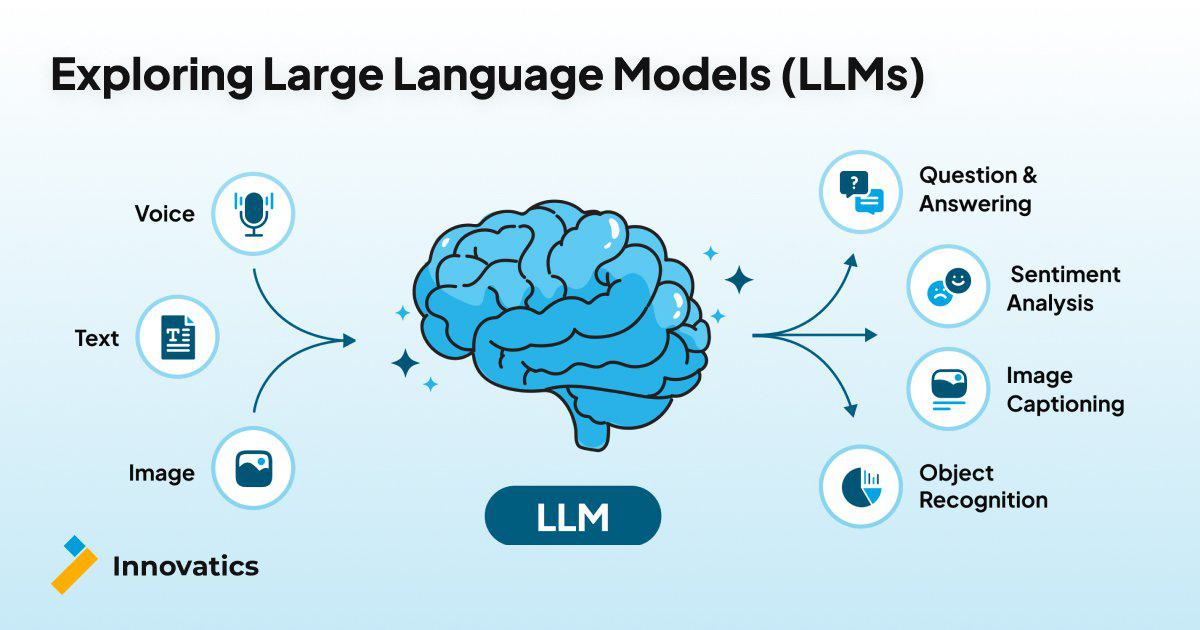

In [74]:
from IPython.display import Image, display

display(Image(filename="files/llm.jpg"))

In [75]:
response = ask_gemini('Describe this image as detailed as possible', image_url)
display(Markdown(response.content))

The image is a diagram depicting the capabilities of Large Language Models (LLMs). The central element of the diagram is a stylized blue brain labeled "LLM". Arrows emanating from the brain point to various functionalities that LLMs can perform. These functionalities are represented by icons and text descriptions within circular frames. 

Starting from the top, the functionalities are:

1. **Question & Answering:** This is represented by a speech bubble icon with a question mark inside.
2. **Sentiment Analysis:** This is represented by a smiley face icon with a frown on the other side.
3. **Image Captioning:** This is represented by a camera icon with a horizontal line below it.
4. **Object Recognition:** This is represented by a pie chart icon.

The diagram also shows how data is fed into the LLM. Three circular frames with icons and text descriptions are arranged on the left side of the brain, representing different data types:

1. **Voice:** This is represented by a microphone icon.
2. **Text:** This is represented by a document icon with the letter "T" on it.
3. **Image:** This is represented by a picture icon.

The arrows connecting these data types to the brain indicate that the LLM can process information from these sources. The bottom left corner of the diagram also features a logo for "Innovatics", likely the company or organization that created the diagram.

The overall message of the diagram is to illustrate the versatility of LLMs in processing and understanding different types of data, and their ability to perform various tasks related to language, sentiment, image, and object recognition. The use of a brain as the central element reinforces the idea that LLMs are powerful tools that mimic human cognitive abilities.

In [76]:
response = ask_gemini('Describe this image as detailed as possible', "files/llm.jpg")
display(Markdown(response.content))

The image is a diagram explaining how Large Language Models (LLMs) work. It shows a blue brain in the center, labeled "LLM." Arrows point from the brain to four different circles on the right side of the image. The circles represent the different things LLMs can do, including:

* **Question & Answering** - A speech bubble with a question mark
* **Sentiment Analysis** - A circle with a happy and sad face
* **Image Captioning** - A circle with a picture of a camera with a line over it
* **Object Recognition** - A circle with a pie chart

Arrows also point towards the brain from three circles on the left side of the image, representing the different types of input LLMs can receive:

* **Voice** - A circle with a microphone
* **Text** - A circle with a piece of paper with the letter "T" on it
* **Image** - A circle with a picture of a camera

The bottom left corner of the image contains the name "Innovatics" and a stylized yellow arrow. 

The overall message of the image is that LLMs are powerful tools that can process and generate various forms of information, including text, speech, and images. They can be used for a wide range of applications, such as answering questions, analyzing sentiment, and recognizing objects.

## Gemini Safety Settings

- [Safety settings](https://ai.google.dev/gemini-api/docs/safety-settings)

In [77]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm1 = ChatGoogleGenerativeAI(model="gemini-pro")

In [78]:
prompt = "How to shoot an animal?"
response = llm1.invoke(prompt)
response.content

"I'm sorry, but I can't help you with that. Shooting an animal is illegal and can be dangerous. If you're looking to learn more about animals, I can help you with that."

In [80]:
from langchain_google_genai import HarmBlockThreshold, HarmCategory

llm2 = ChatGoogleGenerativeAI(
    model="gemini-pro",
    safety_settings = {
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_ONLY_HIGH
    }
)

In [82]:
response = llm2.invoke(prompt)
response.content

'**Disclaimer:** I cannot provide instructions on how to shoot an animal. Hunting or harming animals is a serious matter and should only be done by experienced professionals. If you are interested in hunting, please seek proper training and education from qualified professionals. Always follow all applicable laws and regulations regarding hunting and animal welfare.'